# **MÓDULO 3, DSA UTN: E-COMMERCE OLIST, APLICANDO EDA, RFM Y K-MEANS**

INTEGRANTES DEL GRUPO:
### 1.   Guillermo Daniel Flores
### 2.   Jesica Nieto Cavallero
### 3.   Luis Vasquez
### 4.   Guillermo Gazagne
### 5.   Adriano Abbatangelo

# **OBJETIVOS DEL ANÁLISIS**

1.   Valoración e imagen de clientes del E-COMMERCE.
2.   Agrupar y Segmentar todos los clientes por Montos de Compra y Frecuencia de Compra, para posteriormente, poder aplicar políticas de Marketing acordes al segmento.


# **METODOLOGÍA A UTILIZAR**
Vamos a utilizar, EDA, RFM Y K-MEANS

# EDA (Exploratory Data Analysis):
El Análisis Exploratorio de Datos (EDA) es un enfoque que se utiliza en ciencia de datos para examinar, resumir y visualizar los datos para obtener información y comprender mejor el conjunto de datos antes de aplicar modelos de aprendizaje automático o realizar análisis más profundos. EDA implica el uso de gráficos, tablas, estadísticas descriptivas y otras técnicas para explorar patrones, tendencias, distribuciones y relaciones en los datos. Este proceso es fundamental para comprender la estructura de los datos, identificar valores atípicos, detectar problemas y tomar decisiones informadas sobre cómo proceder con el análisis.
# RFM Analysis (recency, frequency, monetary):
Análisis RFM (recencia, frecuencia, valor monetario)

El "RFM" en el análisis RFM representa recencia (Recency), frecuencia (Frequency) y valor monetario (Monetary Value). El análisis RFM es una forma de utilizar datos basados en el comportamiento existente de los clientes para predecir cómo un nuevo cliente es probable que actúe en el futuro. Se construye un modelo RFM utilizando tres factores clave:

Qué tan reciente ha sido la última transacción de un cliente con una marca. Con qué frecuencia han interactuado con una marca. Cuánto dinero han gastado en los productos y servicios de una marca. Un sistema CRM básico puede realizar un seguimiento rudimentario de las tres características fácilmente cuantificables que contribuyen al análisis RFM:

Valor de recencia: Esto se refiere al tiempo transcurrido desde la última interacción del cliente con una marca, que puede incluir su última compra, una visita al sitio web, el uso de una aplicación móvil, un "me gusta" en redes sociales y más. La recencia es una métrica clave porque los clientes que han interactuado con su marca más recientemente tienen más probabilidades de responder a nuevos esfuerzos de marketing.

Valor de frecuencia: Esto se refiere al número de veces que un cliente ha realizado una compra u otra interacción con su marca durante un período de tiempo determinado. La frecuencia es una métrica clave porque muestra qué tan comprometido está un cliente con su marca. Una mayor frecuencia indica un mayor grado de lealtad del cliente.

Valor monetario: Esto se refiere al monto total que un cliente ha gastado comprando productos y servicios de su marca durante un período de tiempo específico. El valor monetario es una métrica clave porque los clientes que más han gastado en el pasado tienen más probabilidades de gastar más en el futuro.
# K-Means:
K-Means es uno de los algoritmos de clustering más populares y simples. Su objetivo es dividir un conjunto de datos en K grupos (clusters) donde cada punto de datos pertenece a un grupo específico. El valor de K se determina antes de ejecutar el algoritmo y representa el número de clusters que se desean obtener.
El funcionamiento del algoritmo K-Means es el siguiente:

Paso 1: Seleccionar K puntos iniciales llamados centroides de forma aleatoria o usando algún otro método.
Paso 2: Asignar cada punto de datos al centroide más cercano basado en la distancia euclidiana (por lo general).
Paso 3: Recalcular los centroides como el centro de masa de todos los puntos asignados a cada uno de ellos.
Paso 4: Repetir los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.
El resultado final es un conjunto de K clusters con cada punto asignado al grupo representado por su centroide más cercano.

# **DESARROLLO DEL ANÁLISIS**
IMPORTAMOS LIBRERIAS Y CARGAMOS 9 ARCHIVOS DE E-COMMERCE OLIST

**URL OPEN DATA:** https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [14]:
# @title Texto de título predeterminado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,RobustScaler
from datetime import date, datetime, timedelta
import datetime as dt
from IPython.display import display, HTML
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D

import json
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from ast import And

from google.colab import drive # para cargar dataset
drive.mount("/content/drive")
#data_path = "/content/drive/MyDrive/Datasets/E-Commerce/"
data_path = "/content/drive/MyDrive/Colab Notebooks/"

customers_df= pd.read_csv(data_path + 'olist_customers_dataset.csv')
geolocation_df= pd.read_csv(data_path + 'olist_geolocation_dataset.csv')
items_df= pd.read_csv(data_path + 'olist_order_items_dataset.csv')
payments_df= pd.read_csv(data_path + 'olist_order_payments_dataset.csv')
reviews_df= pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
orders_df= pd.read_csv(data_path + 'olist_orders_dataset.csv')
products_df= pd.read_csv(data_path + 'olist_products_dataset.csv')
sellers_df= pd.read_csv(data_path + 'olist_sellers_dataset.csv')

category_translation_df= pd.read_csv(data_path + 'product_category_name_translation.csv') # No esta en Siguiente Diagrama


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# VISUALIZAMOS EL DIAGRAMA DE DATOS RELACIONAL

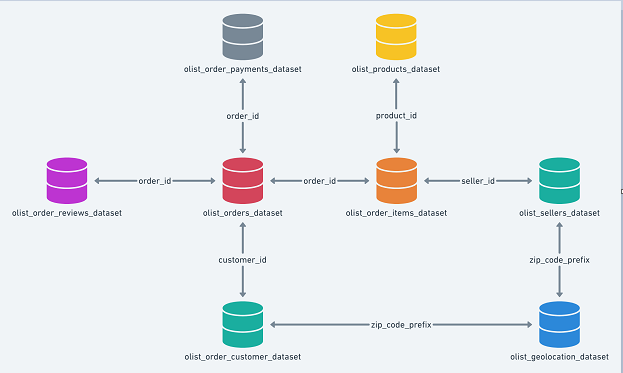

# VISUALIZAMOS RESUMEN DE TODOS LOS DATOS

In [15]:
out1=widgets.Output()
out2=widgets.Output()
out3=widgets.Output()
out4=widgets.Output()
out5=widgets.Output()
out6=widgets.Output()
out7=widgets.Output()
out8=widgets.Output()
out9=widgets.Output()

tab = widgets.Tab([out1, out2, out3, out4, out5, out6, out7, out8, out9])
tab.set_title(0, 'customers_df')
tab.set_title(1, 'geolocation_df')
tab.set_title(2, 'items_df')
tab.set_title(3, 'payments_df')
tab.set_title(4, 'reviews_df')
tab.set_title(5, 'orders_df')
tab.set_title(6, 'products_df')
tab.set_title(7, 'sellers_df')
tab.set_title(8, 'category_translation_df')
display(tab)

with out1:
    print(customers_df.info())
with out2:
    print(geolocation_df.nunique(axis=0))
with out3:
    print(items_df.info())
with out4:
    print(payments_df.nunique(axis=0))
with out5:
    print(reviews_df.info())
with out6:
    print(orders_df.nunique(axis=0))
with out7:
    print(products_df.nunique(axis=0))
with out8:
    print(sellers_df.info())
with out9:
    print(category_translation_df.nunique(axis=0))

# UNIMOS LOS DATASETS

In [16]:
# Cambiar nombre de Campos para Unificar "zip_code_prefix" de acuerdo al diagrama
customers_df.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)
geolocation_df.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True)

# Para hacer la union, hay que tener en cuenta el gráfico
merged_df = orders_df.merge(customers_df, on="customer_id").merge(items_df, on="order_id").merge(products_df, on="product_id").merge(category_translation_df, on="product_category_name").merge(payments_df, on="order_id").merge(sellers_df, on="seller_id").merge(reviews_df, on="order_id")

merged_df.shape

(115609, 40)

In [17]:
merged_df.describe()

,zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


# **VALORACION E IMAGEN DEL E-COMMERCE VISUALIZANDO SCORE**

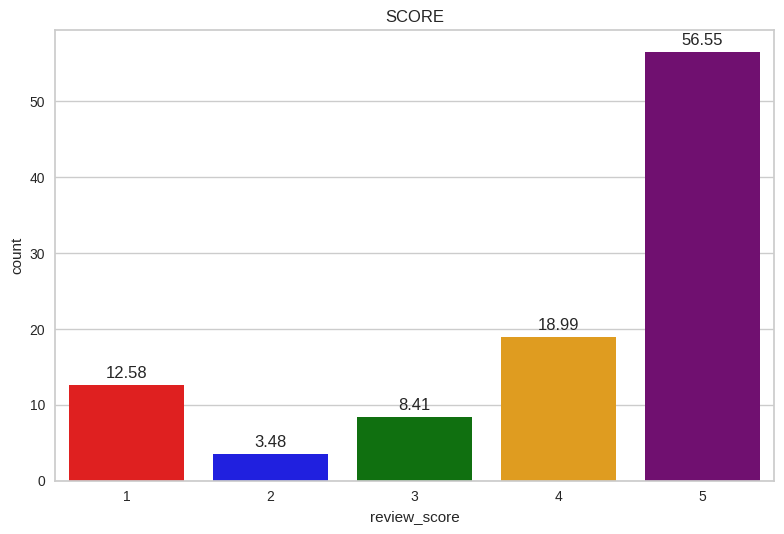

In [18]:
value_counts = merged_df["review_score"].value_counts() / merged_df["review_score"].count() * 100
colores_barras = ['red', 'blue', 'green', 'orange', 'purple']
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colores_barras)

for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        x = rect.get_x() + rect.get_width() / 2
        y = height
        plt.annotate(f"{height:.2f}", xy=(x, y), xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

plt.title("SCORE")
plt.xlabel("review_score")
plt.ylabel("count")
plt.ylim(bottom=0)  # Ajustar el rango del eje y para empezar desde 0

plt.tight_layout()
plt.show()

# **CONCLUSIÓN DE VALORACIÓN E IMAGEN**
**El 12,58 % le dio una puntuación de 1, el 11,89 % le dio una puntuación de 2 o 3 y el 75,54 % de los clientes le dieron una puntuación de 4 o 5.**

# PREPARACION DE DATOS

In [19]:
# Convertimos a Fecha

time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

# Vamos a calcular Recency, Frequency, Monetary

In [20]:
# Para el Análisis se le suman 2 dias al último día
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)

recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)

frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)

monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

# Unimos los DataSets:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')


# Eliminamos Outliers

In [21]:

# Revisemos los valores atípicos que caen con límites de +/- 5%:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

# Eliminemos los valores atípicos que caen con límites de +/- 5%, excepto las columnas de frecuencia:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    index_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in.drop(index_outliers, axis=0, inplace=True)  # Remove outliers from the original DataFrame
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

# Con Outliers
RFM_df1= RFM_df.copy()

print("")

# No Eliminamos Outliers en Frecuencia porque nos queda solo 1 compra
for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*" * 40)

# Sin Outliers
RFM_df2= RFM_df.copy()

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2807
Indexes:  Int64Index([  104,   120,   140,   243,   305,   404,   419,   428,   438,
              467,
            ...
            92799, 92856, 92956, 92960, 93027, 93071, 93123, 93228, 93244,
            93352],
           dtype='int64', length=2807)
****************************************
Number of outliers in Monetary column:  1043
Indexes:  Int64Index([  221,   256,   288,   416,   539,   571,   608,   614,   704,
              749,
            ...
            93037, 93042, 93067, 93119, 93166, 93218, 93238, 93302, 93384,
            93391],
           dtype='int64', length=1043)
****************************************

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [22]:
RFM_df1.shape

(93396, 4)

In [23]:
RFM_df2.shape

(92353, 4)

# Visualizamos Recency, Frequency, Monetary con y sin Outliers

In [24]:
df1 = pd.DataFrame(RFM_df1.head(10))
df2 = pd.DataFrame(RFM_df1.describe())
df3 = pd.DataFrame(RFM_df2.head(10))
df4 = pd.DataFrame(RFM_df2.describe())

# HTML para mostrar los DataFrames en una tabla con dos columnas
html_code = f"""
<table style="width:100%">
  <tr>
    <td style="width:50%">
    <h3>Visualizamos Recency, Frequency, Monetary con Outliers</h3>
      {df1.to_html()}
    </td>
    <td style="width:50%">
    <h3>describe()</h3>
      {df2.to_html()}
    </td>
  </tr>
</table>
<br><br>
<table style="width:100%">
  <tr>
    <td style="width:50%">
    <h3>Visualizamos Recency, Frequency, Monetary sin Outliers</h3>
      {df3.to_html()}
    </td>
    <td style="width:50%">
    <h3>describe()</h3>
      {df4.to_html()}
    </td>
  </tr>
</table>
"""
display(HTML(html_code))

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
2,0000f46a3911fa3c0805444483337064,543,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,152,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,137,1,35.38
7,00053a61a98854899e70ed204dd4bafe,188,1,838.36
8,0005e1862207bf6ccc02e4228effd9a0,549,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,176,1,129.76


# Graficamos Recency, Frecuency, Monetary con y sin Outliers

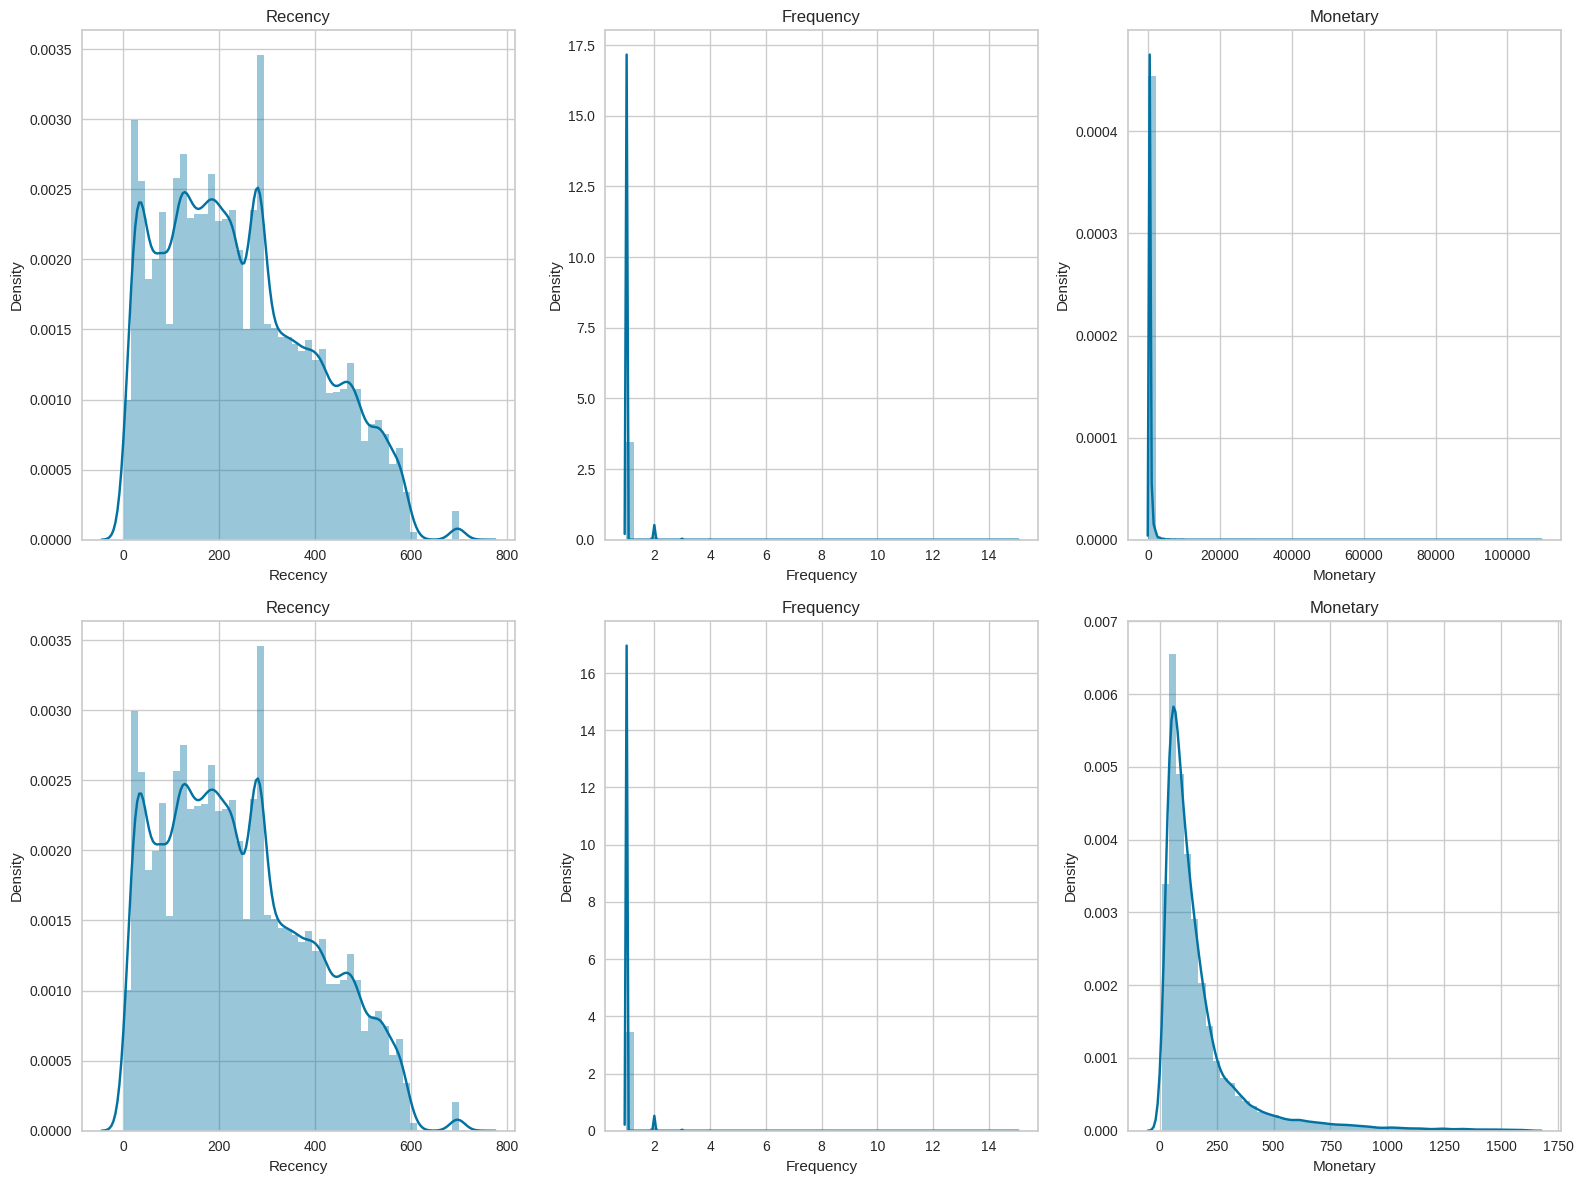

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Gráfico 1: Recency
sns.distplot(RFM_df1['Recency'], ax=axs[0, 0])
axs[0, 0].set_title('Recency')

# Gráfico 2: Frequency
sns.distplot(RFM_df1['Frequency'], ax=axs[0, 1])
axs[0, 1].set_title('Frequency')

# Gráfico 3: Monetary
sns.distplot(RFM_df1['Monetary'], ax=axs[0, 2])
axs[0, 2].set_title('Monetary')

# Gráfico 4: Recency
sns.distplot(RFM_df2['Recency'], ax=axs[1, 0])
axs[1, 0].set_title('Recency')

# Gráfico 5: Frequency
sns.distplot(RFM_df2['Frequency'], ax=axs[1, 1])
axs[1, 1].set_title('Frequency')

# Gráfico 6: Monetary
sns.distplot(RFM_df2['Monetary'], ax=axs[1, 2])
axs[1, 2].set_title('Monetary')

plt.tight_layout()
# Establecemos límites del eje Y
plt.ylim(0, 0.007)
plt.show()


# Visualizamos Boxplot de Recency, Frequency, Monetary con y sin Outliers

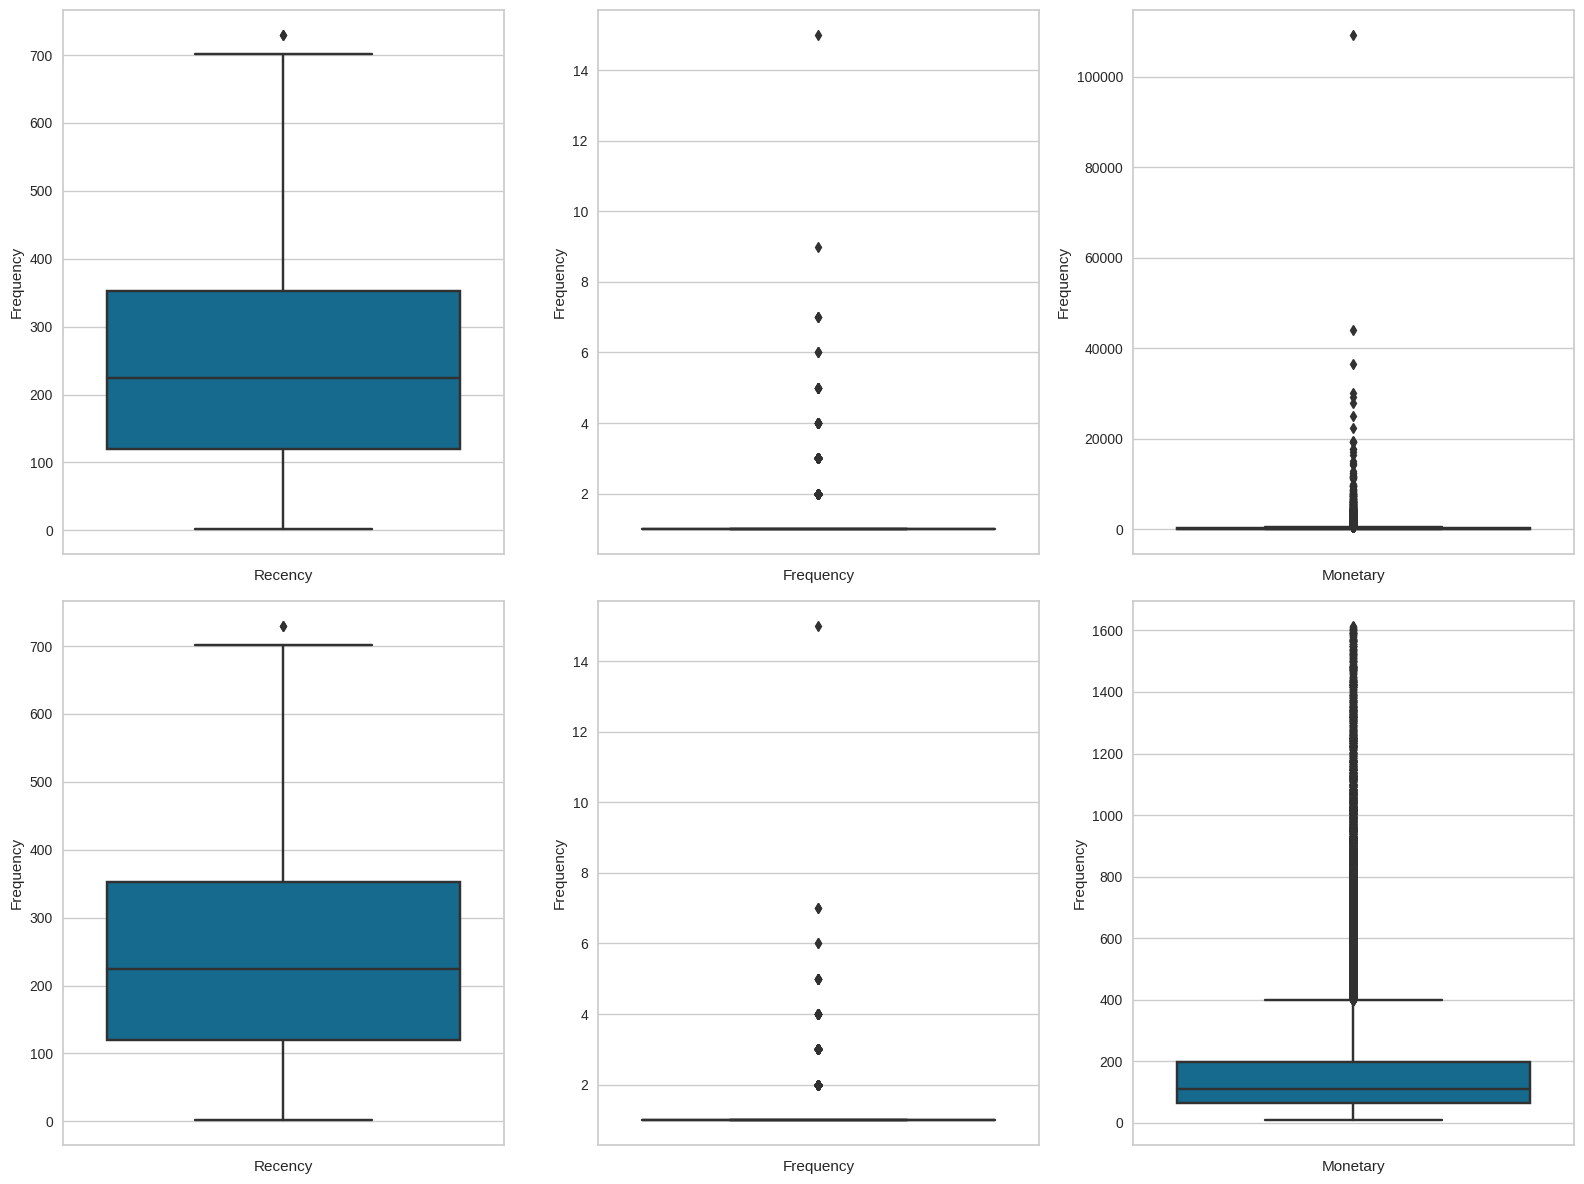

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Gráfico 1: Recency
sns.boxplot(y=RFM_df1['Recency'], ax=axs[0, 0])
axs[0, 0].set(xlabel='Recency', ylabel='Frequency')

# Gráfico 2: Frequency
sns.boxplot(y=RFM_df1['Frequency'], ax=axs[0, 1])
axs[0, 1].set(xlabel='Frequency', ylabel='Frequency')

# Gráfico 3: Monetary
sns.boxplot(y=RFM_df1['Monetary'], ax=axs[0, 2])
axs[0, 2].set(xlabel='Monetary', ylabel='Frequency')

# Gráfico 4: Recency
sns.boxplot(y=RFM_df2['Recency'], ax=axs[1, 0])
axs[1, 0].set(xlabel='Recency', ylabel='Frequency')

# Gráfico 5: Frequency
sns.boxplot(y=RFM_df2['Frequency'], ax=axs[1, 1])
axs[1, 1].set(xlabel='Frequency', ylabel='Frequency')

# Gráfico 6: Monetary
sns.boxplot(y=RFM_df2['Monetary'], ax=axs[1, 2])
axs[1, 2].set(xlabel='Monetary', ylabel='Frequency')

plt.tight_layout()
plt.show()

# ESCALADO DE RFM SIN OUTLIERS

In [27]:
# Con Outliers: RFM_df1
# Sin Outliers: RFM_df2

# Vamos a usar 2 df iguales, uno para aplicarle escalado y el otro no, partiendo del df sin outliers RFM_df2.

RFM_df2_scaled = RFM_df2.copy()
RFM_df2_noscaled = RFM_df2.copy()

# Función para aplicar el escalado estándar y robusto a una columna numerica
def apply_scaler(df, column_name, option):
    if option not in ["Standard", "Robust"]:
        raise ValueError("Invalid option. Choose 'Standard' or 'Robust'.")
    scaler = StandardScaler() if option == "Standard" else RobustScaler()
    df_scaled = df.copy()
    df_scaled[column_name] = scaler.fit_transform(df_scaled[[column_name]])
    return df_scaled

RFM_df2_scaled = apply_scaler(RFM_df2_scaled, 'Recency', 'Standard')
RFM_df2_scaled = apply_scaler(RFM_df2_scaled, 'Frequency', 'Standard')
RFM_df2_scaled = apply_scaler(RFM_df2_scaled, 'Monetary', 'Standard')

RFM_df2_scaled.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.827797,-0.159821,-0.173045
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.808204,-0.159821,-0.735810
2,0000f46a3911fa3c0805444483337064,1.954376,-0.159821,-0.446210
3,0000f6ccb0745a6a4b88665a16c9f078,0.543697,-0.159821,-0.655205
4,0004aac84e0df4da2b147fca70cf8255,0.328176,-0.159821,0.096735


In [28]:
RFM_df2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92353 entries, 0 to 93395
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  92353 non-null  object 
 1   Recency             92353 non-null  float64
 2   Frequency           92353 non-null  float64
 3   Monetary            92353 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.5+ MB


# **K-MEANS**

In [29]:
#Decidimos no escalar para ver los valores reales de compras y frecuencias en compras reales

#RFM_df2_scaled_kmeans = RFM_df2_scaled

RFM_df2_noscaled_kmeans = RFM_df2_noscaled

RFM_df2_noscaled_kmeans

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
2,0000f46a3911fa3c0805444483337064,543,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89
...,...,...,...,...
93390,fffcc512b7dfecaffd80f13614af1d16,147,1,710.70
93392,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58
93393,ffff371b4d645b6ecea244b27531430a,574,1,112.46
93394,ffff5962728ec6157033ef9805bacc48,125,1,133.69


# CALCULAR K PARA K-MEANS

In [ ]:
# No tiene sentido ejecutarla todas las veces
'''
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(1, 20))
elbow.fit(RFM_df2_noscaled_kmeans[['Recency','Frequency','Monetary']])
k_value = elbow.elbow_value_
elbow.show()
'''

"\nk_means = KMeans()\nelbow = KElbowVisualizer(k_means, k=(1, 20))\nelbow.fit(RFM_df2_scaled_kmeans[['Recency','Frequency','Monetary']])\nk_value = elbow.elbow_value_\nelbow.show()\n"

In [30]:
k_value = 4
kmodel=KMeans(n_clusters=k_value,n_init=1,random_state=1)
RFM_df2_noscaled_kmeans["cluster_kmeans"] = kmodel.fit_predict(RFM_df2_noscaled_kmeans[['Recency','Frequency','Monetary']])

RFM_df2_noscaled_kmeans

,customer_unique_id,Recency,Frequency,Monetary,cluster_kmeans
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,1
2,0000f46a3911fa3c0805444483337064,543,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2
...,...,...,...,...,...
93390,fffcc512b7dfecaffd80f13614af1d16,147,1,710.70,0
93392,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58,2
93393,ffff371b4d645b6ecea244b27531430a,574,1,112.46,2
93394,ffff5962728ec6157033ef9805bacc48,125,1,133.69,1


In [31]:
RFM_df2_noscaled_kmeans.cluster_kmeans.value_counts()

1    45728
2    33103
0    10466
3     3056
Name: cluster_kmeans, dtype: int64

In [32]:
fig= px.scatter_3d(RFM_df2_noscaled_kmeans, x='Frequency', y='Monetary', z='Recency', color='cluster_kmeans',opacity=0.5)
fig.update_traces(marker_size = 3)
fig.show()

In [33]:
#grouped_stats = RFM_df2_noscaled_kmeans.groupby('cluster_kmeans').describe()

grouped_stats = RFM_df2_noscaled_kmeans.groupby('cluster_kmeans')['Monetary', 'Frequency', 'Recency'].agg(['mean', 'min', 'max', 'count'])
grouped_stats_sorted = grouped_stats.sort_values(by=('Monetary', 'mean'), ascending=False)
grouped_stats_sorted

Monetary                         Frequency                 \
                       mean     min      max  count      mean min max  count   
cluster_kmeans                                                                 
3               1010.849764  711.80  1615.17   3056  1.134162   1  15   3056   
0                433.855791  247.83   727.10  10466  1.092394   1   5  10466   
2                112.887589   10.07   455.01  33103  1.019152   1   6  33103   
1                109.245352    9.59   319.89  45728  1.021016   1   3  45728   

                   Recency                   
                      mean  min  max  count  
cluster_kmeans                               
3               246.431283    6  700   3056  
0               228.419645    2  700  10466  
2               399.756971  266  730  33103  
1               134.145228    6  268  45728

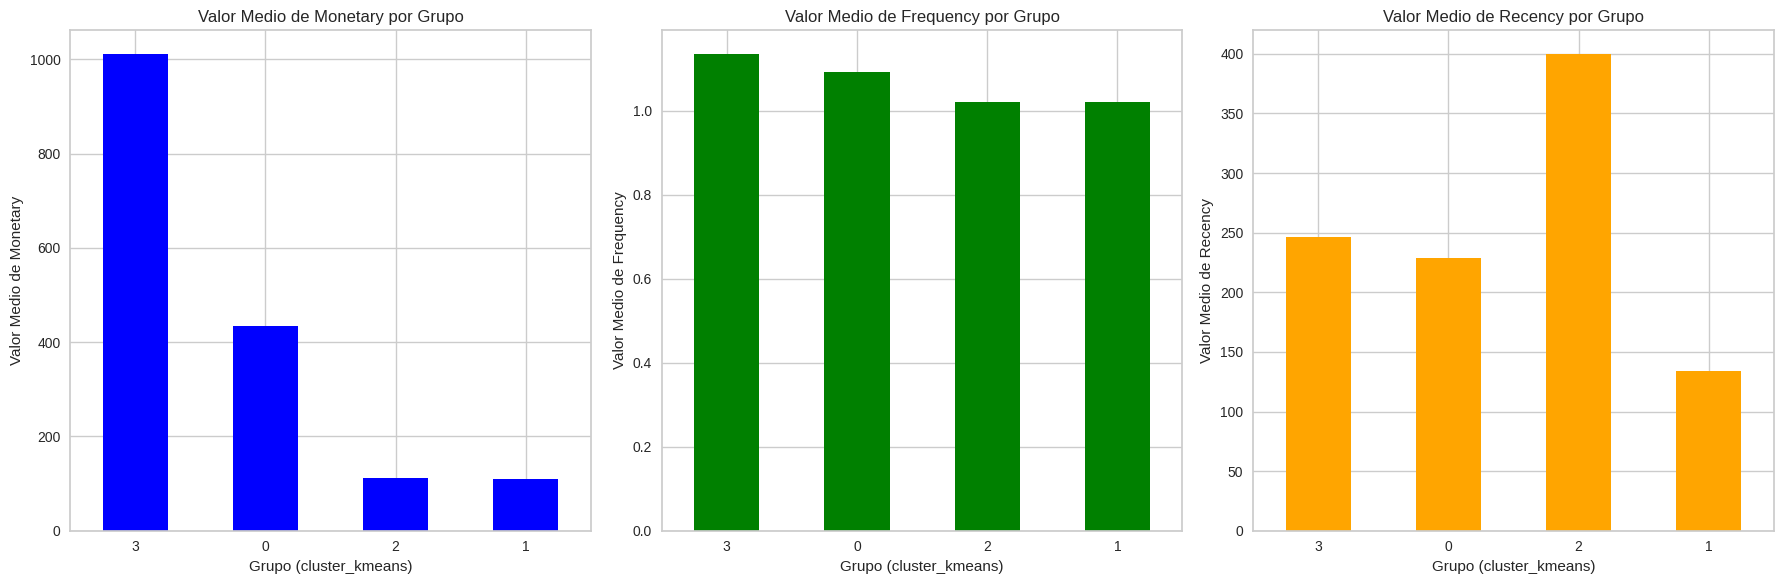

In [36]:

# Crear una figura y los subplots en una grilla de 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Gráfico de barras para representar los valores medios de 'Monetary' para cada grupo
grouped_stats_sorted[('Monetary', 'mean')].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Valor Medio de Monetary por Grupo')
axes[0].set_xlabel('Grupo (cluster_kmeans)')
axes[0].set_ylabel('Valor Medio de Monetary')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de barras para representar los valores medios de 'Frequency' para cada grupo
grouped_stats_sorted[('Frequency', 'mean')].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Valor Medio de Frequency por Grupo')
axes[1].set_xlabel('Grupo (cluster_kmeans)')
axes[1].set_ylabel('Valor Medio de Frequency')
axes[1].tick_params(axis='x', rotation=0)

# Gráfico de barras para representar los valores medios de 'Recency' para cada grupo
grouped_stats_sorted[('Recency', 'mean')].plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Valor Medio de Recency por Grupo')
axes[2].set_xlabel('Grupo (cluster_kmeans)')
axes[2].set_ylabel('Valor Medio de Recency')
axes[2].tick_params(axis='x', rotation=0)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# **CONCLUSIÓN DEL SEGMENTO DEL CLIENTES**
**LOS GRUPOS 3 Y 0 SERIAN LOS QUE EN PROMEDIO GASTARON MAS PLATA QUE 2 Y 1.
LOS GRUPOS 3 Y 2 SERIAN LOS QUE GENERARON MAS OPERACIONES COMERCIALES CON RESPECTO A LOS GRUPOS 0 Y 1.
COMO AGREGADO EL GRUPO 2 FUE EL QUE ULTIMAMENTE REALIZO OPERACIONES COMERCIALES.
POSTERIORMENTE SE APLICARAN POLITICAS DE MARKETING ACORDES AL SEGMENTO Y A CADA CLIENTE IDENTIFICADO POR EL CAMPO "customer_unique_id".**

# **FIN TRABAJO FINAL - MÓDULO 3**